# Sterling & Draper Trends Project

As analysts at the advertising agency **Sterling & Draper**, we spend a significant amount of time studying YouTube video trends to determine which content deserves attention in our marketing efforts. Each video falls into a specific category, such as entertainment, music, news, or politics, and is associated with a region and a date when it became trending.

Often, a video remains in the trending section for several consecutive days. Every week, our new colleagues, **Melanie and Ashok**, ask us which categories were trending last week, how these trends were distributed across various regions, and which categories were particularly popular in the United States.

Recognizing the need for a more efficient process, we decided it was time to automate these inquiries by creating a dashboard for Melanie and Ashok. This dashboard would allow them to access the information they need quickly and clearly, without having to ask for updates manually.

We began by discussing the content, design, and data requirements of the dashboard with Melanie and Ashok. After that, we coordinated with the database administrators and engineers to understand where and how the necessary data is collected and transformed. We also made sure to determine the best place to store the aggregated tables that the dashboard would use.

Once we gathered all the technical requirements, we moved forward with building the data pipeline and designing the dashboard. The dashboard, intended to be used at least once daily by our video planning managers, provides a comprehensive analysis of YouTube video trends.

The dashboard includes:
* Past video trends, sorted by day and category.
* Video trends organized by country.
* A table showing the correspondence between categories and countries.

To organize the data, we grouped it by:
* Date and time of the trend.
* Video category.
* Country.

The primary data source is an aggregation table named "trending_by_time," created specifically for our needs and stored in the "youtube" database. This table updates every 24 hours at midnight UTC.

With these elements in place, we designed a dashboard that visually presents the data in a way that is both informative and easy to interpret, ensuring that all visuals are equally important and accessible to our team. 

In the end, the dashboard would look like this:

<img src="https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_11.5.2ES_1655899599.png" alt="Dashboard Layout" width="500">

This dashboard now serves as a valuable tool for understanding and leveraging YouTube video trends in our marketing strategies.

[**Click Here to Watch a Presentation with overall Conclusions**](https://www.canva.com/design/DAGOc6Bhru8/eG9R0oKQfyYlIb-otzxsKw/view?utm_content=DAGOc6Bhru8&utm_campaign=designshare&utm_medium=link&utm_source=editor)

I will start by performing some modifications to the primary data source. Let's begin.

We start by importing libraries:

In [1]:
# Python Standard Libraries
import datetime
import json
import os

# Third Party Libraries
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Create a variable which contains some modifications for the table before uploading it in a dataframe format:

In [2]:
dtype = {
    'trending_date':'datetime',
    'category_title': 'category'
}

We upload the file and perform those modifications to the dataframe, as well as we change some column titles:

In [3]:
df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/trending_by_time.csv', 
                 dtype={'category_title': 'category'},
                 parse_dates=['trending_date'])

df.set_index('record_id', inplace=True)
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%m-%d %H:%M:%S.%f')

df.columns = df.columns.str.strip().str.lower()
df.rename(columns={
    'category_title':'category'
}, inplace=True)

Let's see what we've got:

In [4]:
print(df.info())
print('')
print('')
df 

<class 'pandas.core.frame.DataFrame'>
Index: 12343 entries, 1 to 12343
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   region         12343 non-null  object        
 1   trending_date  12343 non-null  datetime64[ns]
 2   category       12343 non-null  category      
 3   videos_count   12343 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(1), object(1)
memory usage: 398.5+ KB
None




,region,trending_date,category,videos_count
record_id,,,,
1,France,2017-11-14,Autos & Vehicles,8
2,France,2017-11-15,Autos & Vehicles,2
3,France,2017-11-16,Autos & Vehicles,6
4,France,2017-11-17,Autos & Vehicles,8
5,France,2017-11-18,Autos & Vehicles,4
...,...,...,...,...
12339,United States,2018-06-10,Travel & Events,2
12340,United States,2018-06-11,Travel & Events,2
12341,United States,2018-06-12,Travel & Events,2


Before we proceed, we need to make a clarification regarding dates, hours, minutes and seconds.

In our project, we were required to create a dashboard that included filters for both the date and time of trending videos. However, we encountered an issue with the time data, as the hours, minutes, and seconds were all set to zero in the original dataset. This meant that the time information was not meaningful and could not be used effectively for filtering.

To ensure that our analysis was accurate and focused on the relevant data, we made the decision to discard the time component and only use the date information. This allowed us to create a cleaner, more functional dashboard that still met the primary goal of analyzing YouTube video trends by date and category.

This approach helped us maintain the integrity of our data and ensured that the filters we implemented provided valuable insights without any confusion or inaccuracy caused by the unusable time data.

Let's continue with our exploration:

In [5]:
unique_regions = df['region'].unique().tolist()
unique_regions


['France', 'India', 'Japan', 'Russia', 'United States']

We can see there's only 5 "Regions". Same with categories; there's 18 of them:

In [6]:
unique_categories = df['category'].unique().tolist()
unique_categories

['Autos & Vehicles',
 'Comedy',
 'Education',
 'Entertainment',
 'Film & Animation',
 'Gaming',
 'Howto & Style',
 'Movies',
 'Music',
 'News & Politics',
 'People & Blogs',
 'Pets & Animals',
 'Science & Technology',
 'Shows',
 'Sports',
 'Trailers',
 'Travel & Events',
 'Nonprofits & Activism']

In our analysis, we examined the distribution of the videos_count variable to understand how frequently different numbers of videos appeared in the trending section. This analysis provides insight into the general trends and outliers within the data, helping us identify typical video counts and any unusual patterns:

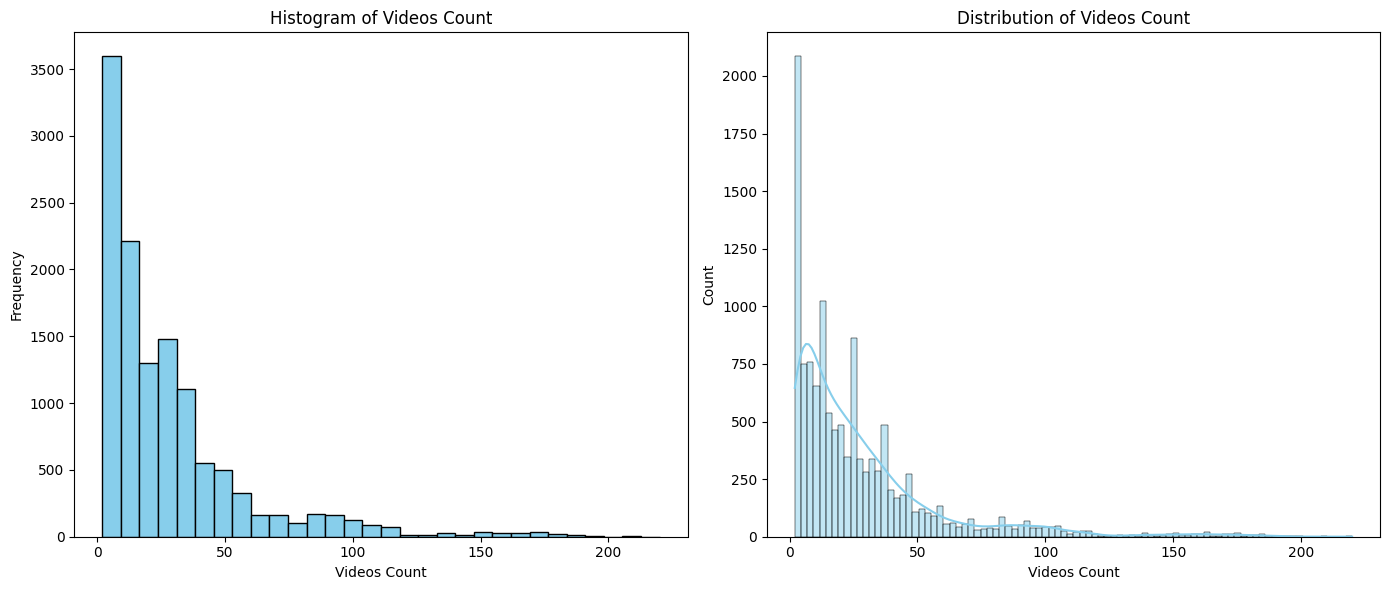

In [7]:
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['videos_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Videos Count')
plt.xlabel('Videos Count')
plt.ylabel('Frequency')

# Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['videos_count'], kde=True, color='skyblue')
plt.title('Distribution of Videos Count')
plt.xlabel('Videos Count')

plt.tight_layout()
plt.show()

The histogram on the left reveals that the majority of trending instances have a low number of videos, with a sharp drop-off as the count increases.

Same with the distribution plot on the right, which shows a right-skewed distribution, indicating that most videos trend in smaller quantities, while a few instances with higher counts are less common but still present.

The presence of a long tail suggests that although high video counts are rare, they do occur.

Now let's visualize the distribution of videos count across the entire dataset. This scatter plot helps us identify any patterns, clusters, or anomalies in how video counts are distributed, giving us a clearer picture of the data as a whole.

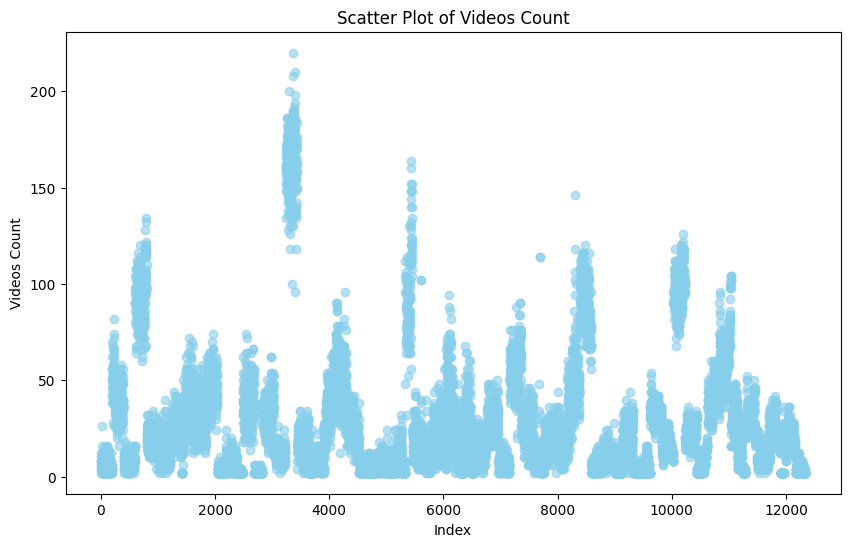

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df['videos_count'], color='skyblue', alpha=0.6)
plt.title('Scatter Plot of Videos Count')
plt.xlabel('Index')
plt.ylabel('Videos Count')
plt.show()


The scatter plot shows that while most videos_count values are concentrated at lower counts, there are notable spikes where the count significantly increases.

These spikes indicate outliers where a much larger number of videos trended simultaneously. These outliers could represent special events or anomalies worth further investigation.

The overall pattern suggests that high video counts are relatively infrequent, with most data points clustering below 50 videos, reinforcing the trend seen in the histogram and distribution plots.

# The Working Model

To build our dashboard, we are discarding the **trending_by_time.csv** dataset that we were given originally and will use a refined dataset that contains key information necessary for analyzing YouTube video trends. 

The dataset is , each representing a unique instance of a video trending in a specific region on a particular date.

Our model is basically the same; structured with 12,343 entries and same columns, but with the modifications we've performed previously:

In [9]:
print(df.info())
print('')
print('')
df 

<class 'pandas.core.frame.DataFrame'>
Index: 12343 entries, 1 to 12343
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   region         12343 non-null  object        
 1   trending_date  12343 non-null  datetime64[ns]
 2   category       12343 non-null  category      
 3   videos_count   12343 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(1), object(1)
memory usage: 398.5+ KB
None




,region,trending_date,category,videos_count
record_id,,,,
1,France,2017-11-14,Autos & Vehicles,8
2,France,2017-11-15,Autos & Vehicles,2
3,France,2017-11-16,Autos & Vehicles,6
4,France,2017-11-17,Autos & Vehicles,8
5,France,2017-11-18,Autos & Vehicles,4
...,...,...,...,...
12339,United States,2018-06-10,Travel & Events,2
12340,United States,2018-06-11,Travel & Events,2
12341,United States,2018-06-12,Travel & Events,2


# Analysis

Let's state some key observations from the analyses they asked us for the dashboard, starting with the Trends History in absolute numbers:

## Trends History - Absolute

The "Trends History - Absolute" graph presents the total count of trending videos over time, broken down by different content categories:

<img src="https://raw.githubusercontent.com/ricardosillercardenas/da_projects_dataframes/main/sprint12_trends_percentage.png" alt="Trends History - Absolute" width="500">

Several key patterns can be observed:

* **Dominance of Certain Categories:** The graph shows that a few categories, such as "Autos & Vehicles," "Entertainment," and "Film & Animation," consistently have higher counts compared to other categories. These categories occupy a significant portion of the graph, indicating their strong presence in trending videos over time.

* **Seasonal Peaks:** There are noticeable peaks in the total video counts, particularly around January 2018 and again in April 2018. This suggests that certain periods are more active in terms of videos trending, possibly due to seasonal events, holidays, or other cyclical factors influencing content popularity.

* **Steady Increase and Decrease:** The graph indicates a general increase in the number of trending videos from November 2017 to early 2018, followed by a gradual decrease. This could be indicative of content release strategies, where more videos are pushed to trend during the end of the year and early in the new year, followed by a tapering off.

* **Variety of Categories:** While a few categories dominate the graph, there is still a wide variety of categories represented. This diversity suggests that trending content on YouTube is not limited to a few types of videos but includes a broad spectrum of content types, catering to different audience interests.

Overall, this graph provides a clear visualization of the trends over time, showing the dynamics of video popularity across various categories and helping identify key periods of high activity.

## Trends History - Percentage

Let's see how trends change or stay relatively the same if we analyze them in percentaje numbers:

<img src="https://raw.githubusercontent.com/ricardosillercardenas/da_projects_dataframes/main/sprint12_trends_absolute.png" alt="Trends History - Absolute" width="500">

The "Trends History - Percentage" graph offers a clear view of the relative importance of different content categories within the overall trending video landscape over time. Here are the key observations and some differences compared to the "Trends History - Absolute" graph:

1. **Relative Stability Across Categories:** Unlike the "Absolute" graph, where the total number of videos trending fluctuates significantly, the "Percentage" graph shows more stable distributions across categories. This suggests that while the absolute number of videos may increase or decrease, the relative share of each category remains more consistent.

2. **Balanced Representation:** Categories such as "Autos & Vehicles," "Entertainment," and "Film & Animation" dominate the trends in both absolute numbers and percentage terms. However, in the percentage graph, their dominance is less visually overwhelming, indicating that while these categories have more videos trending, other categories still maintain a significant presence.

3. **Smaller Categories’ Impact:** Categories like "Pets & Animals" and "Science & Technology," which appear minor in the "Absolute" graph, show a more noticeable presence in the "Percentage" graph. This indicates that while they may have fewer total videos, their share of the total trending content is relatively stable.

4. **Consistency Over Time:** The percentage graph reveals that even during periods of high overall activity (as seen in the peaks of the absolute graph), the relative distribution among categories does not drastically change. This implies that content diversity remains a constant, regardless of the volume of trending videos.

5. **Subtle Category Shifts:** Some categories, such as "Gaming" and "News & Politics," show slight variations in their percentage over time, reflecting changing viewer interests or content strategies. These shifts are more pronounced when viewed in percentage terms compared to absolute numbers, where larger categories can overshadow these trends.

In conclusion, while both graphs provide valuable insights, the "Percentage" graph emphasizes the relative importance of each category over time, showing that even during periods of high activity, the distribution across different content types remains fairly balanced. This contrasts with the "Absolute" graph, where the focus is more on the sheer volume of trending videos, highlighting different patterns and trends.

## Video Trends by Country

Now, let's bake a pie which illustrates the distribution of trending videos across five regions:

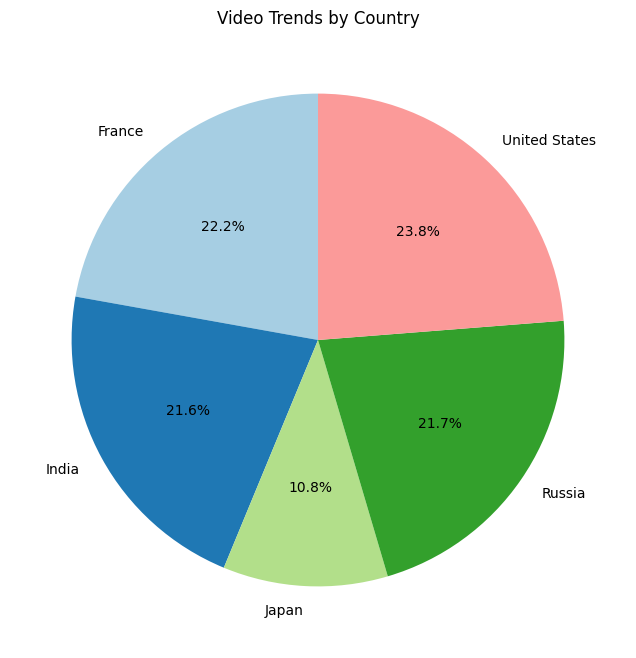

In [10]:
grouped_country = df.groupby('region')['videos_count'].sum()

# Let's bake a pie 
plt.figure(figsize=(8, 8))
grouped_country.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Video Trends by Country')
plt.ylabel('')  # We remove the y-label to match Tableau's style... sort of
plt.show()

Here's the key observations:

* **United States** leads in video trends, representing 23.8% of the total.
* **France and Russia** closely follow, with 22.2% and 21.7% respectively.
* **India** contributes 21.6% of the trends, nearly equal to Russia's share.
* **Japan** has the smallest portion, accounting for 10.8% of the trending videos.

This distribution shows that video trends are fairly evenly spread across these regions, with the United States slightly ahead.

## Trends by Country and Category

Finally, the're asking us to show the trends by country and category in the dashboard. The best way to do this is with a pivot table, in which we will place the categories in the rows and the countries in the columns:

In [11]:
pivot_table = pd.pivot_table(df, 
                             values='videos_count', 
                             index='category', 
                             columns='region', 
                             aggfunc='sum',
                             fill_value=0)
pivot_table

/var/folders/p7/dv7dwrpx4fd5tj67j73brvvw0000gn/T/ipykernel_2840/1455970756.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df,


region,France,India,Japan,Russia,United States
category,,,,,
Autos & Vehicles,1220,138,538,3116,758
Comedy,8446,6814,1372,5968,6870
Education,1480,2360,212,1326,3284
Entertainment,19020,32924,11734,11692,19638
Film & Animation,3768,3298,2140,5676,4680
Gaming,2786,132,1834,2050,1606
Howto & Style,4668,1674,1574,3928,8280
Movies,22,32,0,2,0
Music,7658,7714,2480,3664,12874


Just as a quick note: In the Tableau version, we aded the totals to this pivot table.

# Conclusion

Let's answer some critical questions:

1. What video categories trended most frequently?

* By examining the "Trends History - Absolute" chart, we can see that certain categories, such as Entertainment and Music, have consistently high video counts throughout the entire period. These categories appear to be the most frequently trending ones.
* The "Trends by Country and Category" table also shows high absolute numbers for these categories across all regions.

**Answer: The most frequently trending video categories are Entertainment and Music, as evidenced by their consistently high counts over time.**

2. How were these categories distributed across different regions?

* The "Video Trends by Country" pie chart provides a breakdown of how video categories are distributed across different regions.
* The "Trends by Country and Category" table allows for a detailed comparison across regions.

**Answer: The distribution of trending video categories varies across regions, with Entertainment and Music consistently appearing in the top categories in most regions. However, certain categories like Gaming and Education show higher trends in specific countries like India and Japan, reflecting regional preferences.**

3. Which categories were particularly popular in the United States? Were there differences between the popular categories in the U.S. and other regions?

* The "Trends by Country and Category" table shows that in the United States, Music, Entertainment, and Comedy are among the most popular categories.
* When comparing this with other regions, we can see that while Entertainment and Music are popular globally, categories like Comedy have a stronger presence in the U.S. compared to other regions.

**Answer: In the United States, the most popular categories are Music, Entertainment, and Comedy. There are some differences when compared to other regions, such as a stronger preference for Comedy in the U.S., while regions like India and Japan show higher trends in categories like Gaming and Education.**

These insights derived from our dashboard effectively answer the questions posed. The dashboard enables Melanie and Ashok to observe both the overall trends and regional differences in video category popularity on YouTube.

[**Click Here to see the Dashboard in Tableau Public**](https://public.tableau.com/views/TTSprint12-RicardoSillerCardenas/Dashboard1?:language=es-ES&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

Let's take a look at the Tableau dashboard:

<iframe src="https://public.tableau.com/views/TTSprint12-RicardoSillerCardenas/Dashboard1?:showVizHome=no&:embed=true"
        width="100%" height="800px"></iframe>
